In [ ]:
Prueba exportando uno de los modelos generados por el AutoPilot estudiando la diferencia entre PP y PSOE como clasificación en 5 categorías ()

In [ ]:
#! pip install xgboost
#! pip install xgboost==0.80
#! pip install --upgrade xgboost en este notebook trabajo con la última versión
#to load back params bst.load_config(config)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import pickle
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import Booster
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [ ]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

#print(f'Dimensiones del dataset de training: {train.shape}')
#print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
#train.to_csv('train_set_RF_dif_PP_PSOE.txt', index=False)
#test.to_csv('test_set_RF_dif_PP_PSOE.txt', index=False)


In [2]:
df_test = pd.read_csv('test_A_19_dif_PP_PSOE.csv') #dataset abril ya dividido en train,test y parcialmente limpio

In [3]:
df_test.head().T

,0,1,2,3,4
CCAA,0.953994,0.953994,2.100652,2.677973e+00,2.525163
Censo_Esc,638.000000,736.000000,875.000000,9.310000e+02,1289.000000
Participación,0.752351,0.811141,0.576000,8.367347e-01,0.685803
0-4,18.000000,21.000000,66.000000,6.000000e+01,149.000000
5-9,30.000000,36.000000,52.000000,6.500000e+01,152.000000
10-14,46.000000,57.000000,81.000000,4.900000e+01,149.000000
15-19,33.000000,34.000000,79.000000,6.200000e+01,118.000000
20-24,30.000000,45.000000,85.000000,8.500000e+01,119.000000
25-29,30.000000,48.000000,91.000000,8.900000e+01,165.000000
30-34,39.000000,47.000000,79.000000,8.700000e+01,188.000000


In [4]:
X = df_test.iloc[:, :-1]
y = df_test.iloc[:, -1]

In [5]:
print(X.shape)
print(y.shape)


(7264, 47)
(7264,)


In [6]:
y = y.values.reshape(-1,1)

In [7]:
print(type(X))
type(y)

<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [8]:
columnas = X.columns

In [9]:
print(columnas)

Index(['CCAA', 'Censo_Esc', 'Participación', '0-4', '5-9', '10-14', '15-19',
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99',
       '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayores 45',
       '% Paro s/ Afiliados SS Municipio', 'Renta persona 2017',
       'Renta persona 2015', 'Renta hogar 2017', 'Renta hogar 2015',
       'Renta Salarios 2018', 'Renta Salarios 2015', 'Renta Pensiones 2018',
       'Renta Pensiones 2015', 'Renta Desempleo 2018', 'Renta Desempleo 2015'],
      dtype='object')


In [10]:
#label = pd.DataFrame(np.random.randint(2, size=4))
#dtrain = xgb.DMatrix(X, label=label)
dtest = xgb.DMatrix(X,label=y,feature_names=columnas)
#xgb.DMatrix(Xtrain, label=ytrain, feature_names=feature_names)

In [11]:
type(dtest)

xgboost.core.DMatrix

In [12]:
model = pickle.load(open("xgboost-model-0", "rb")) 

In [13]:
y_pred = model.predict(dtest)

In [14]:
print(y_pred)  


[[0.7420369  0.19384748 0.01670649 0.01328947 0.03411975]
 [0.7448282  0.18483865 0.0190899  0.01360901 0.0376342 ]
 [0.0635872  0.40178517 0.23870338 0.18469131 0.11123292]
 ...
 [0.06750078 0.47715998 0.16388042 0.15764414 0.13381466]
 [0.04813087 0.5730158  0.13453229 0.13672765 0.10759335]
 [0.05701546 0.48823717 0.14742501 0.1875629  0.11975943]]


In [25]:
y

array([[2],
       [1],
       [3],
       ...,
       [2],
       [3],
       [3]], dtype=int64)

In [20]:
#model.load_parameters('./model.tar')
#model_xgb_2 = Booster()
#model_xgb_2.load_model("xgboost-model-0")
print(type(y))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
def xgb_f1(y, t, threshold=0.2):
    t = t.get_label()
    y_bin = (y > threshold).astype(int) # works for both type(y) == <class 'numpy.ndarray'> and type(y) == <class 'pandas.core.series.Series'>
    return 'f1',f1_score(t,y_bin)

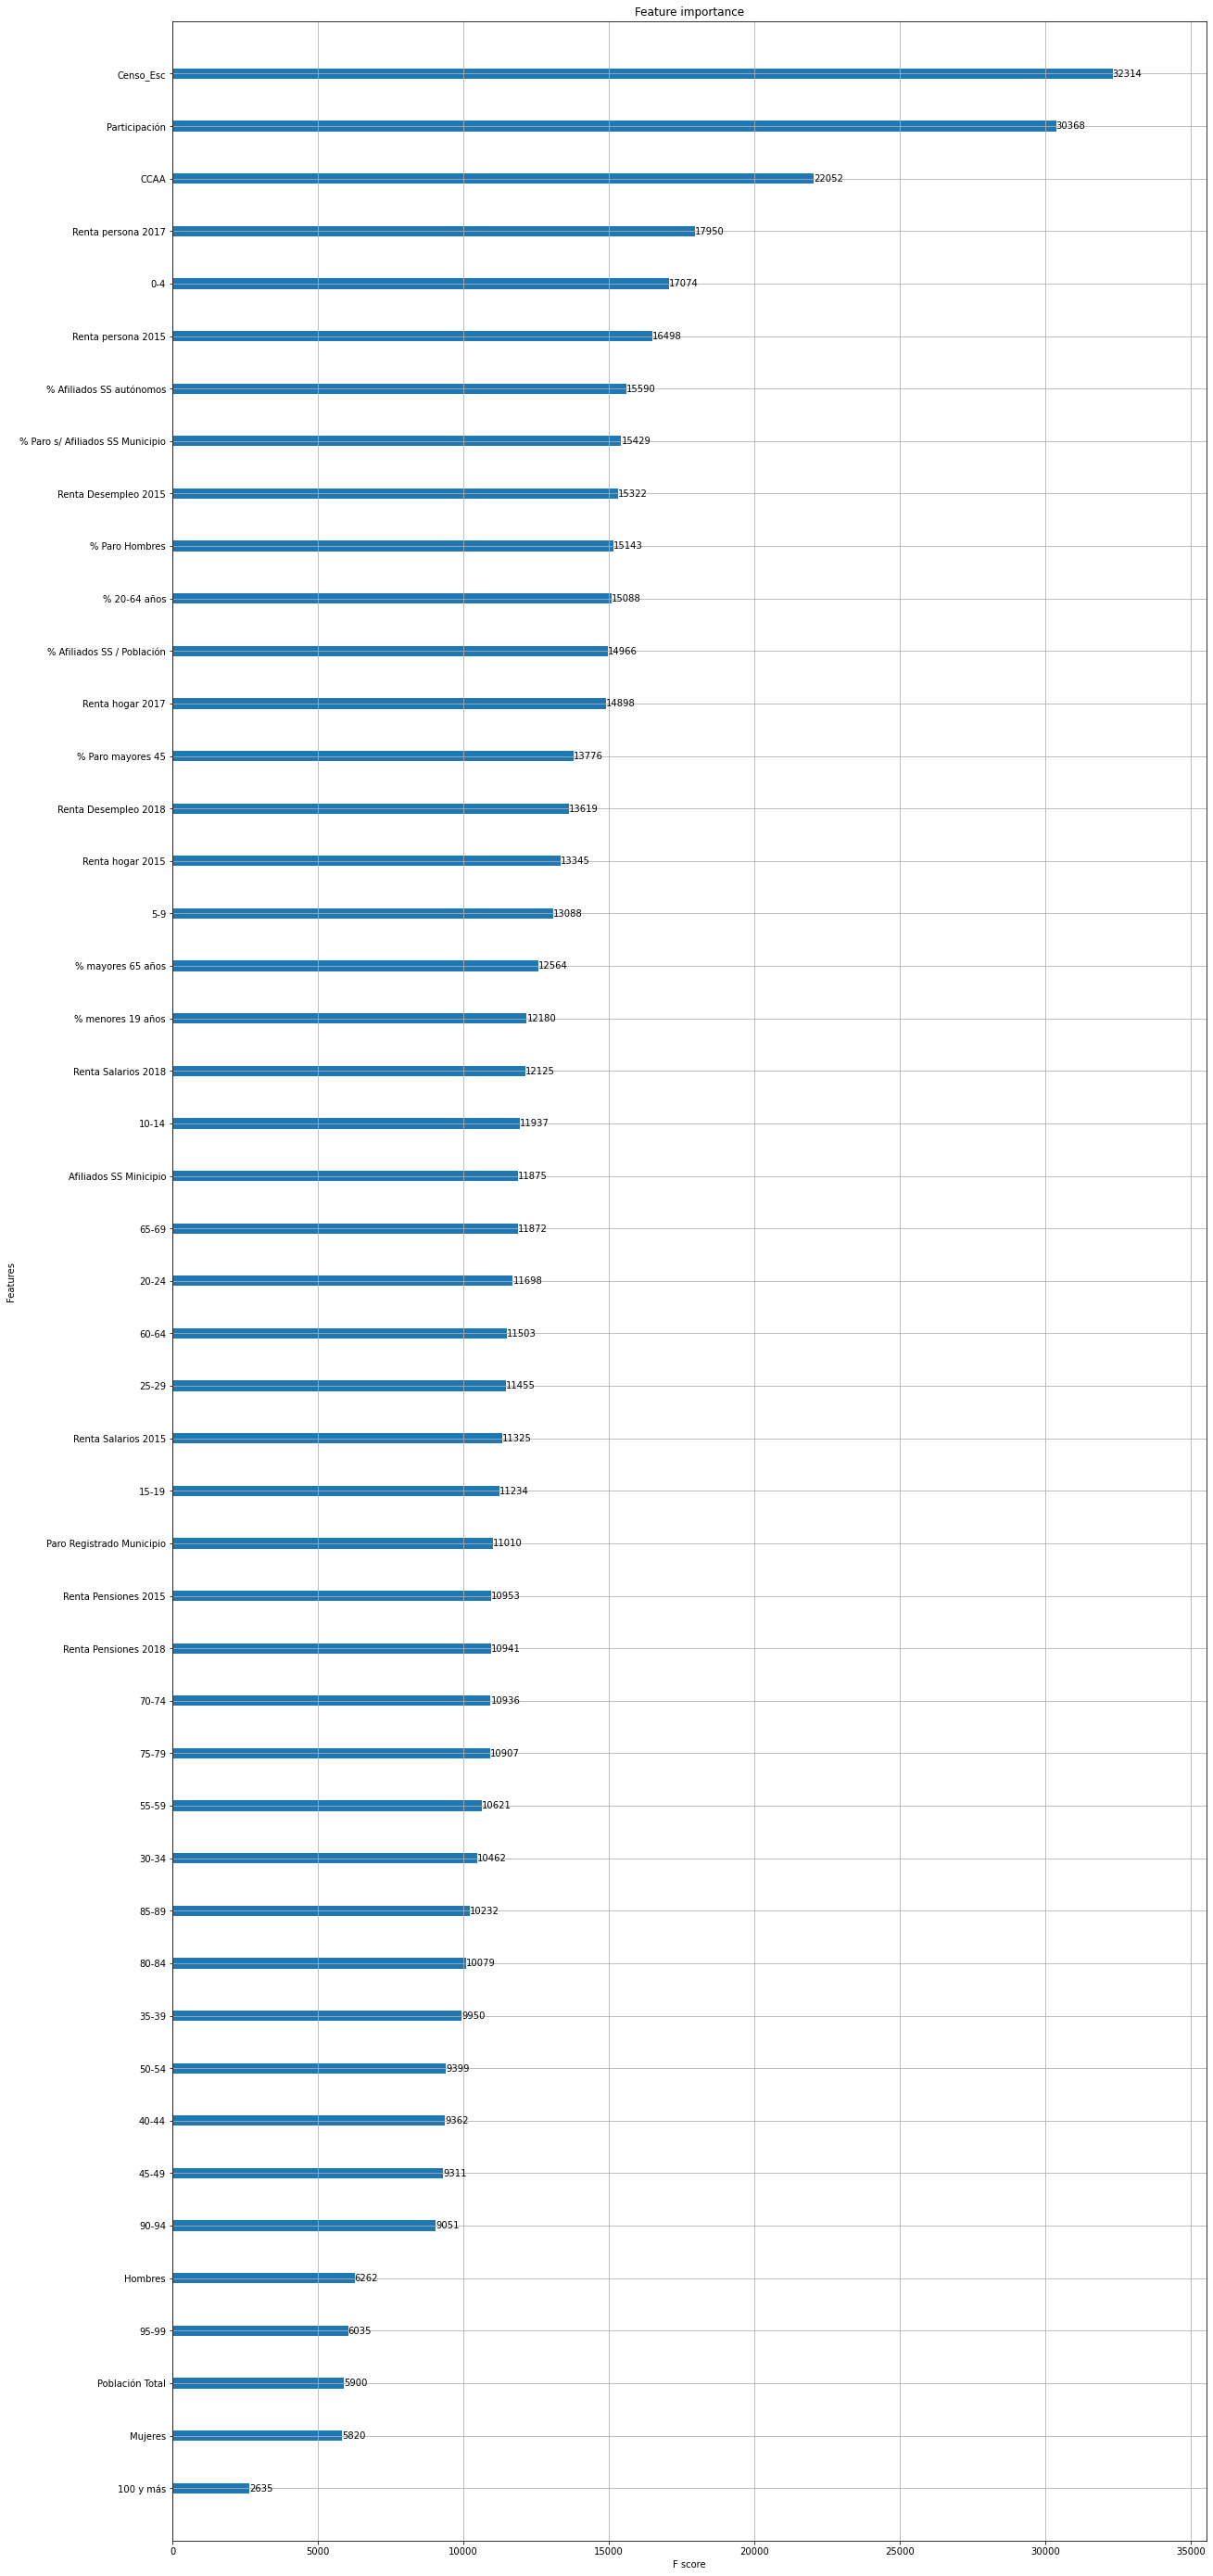

In [16]:
xgb.plot_importance(model) #me parece sospechoso que le de importancia a 0-4...que yo creo por otro lado que podríamos borrar. 
plt.rcParams["figure.figsize"] = (20,50)


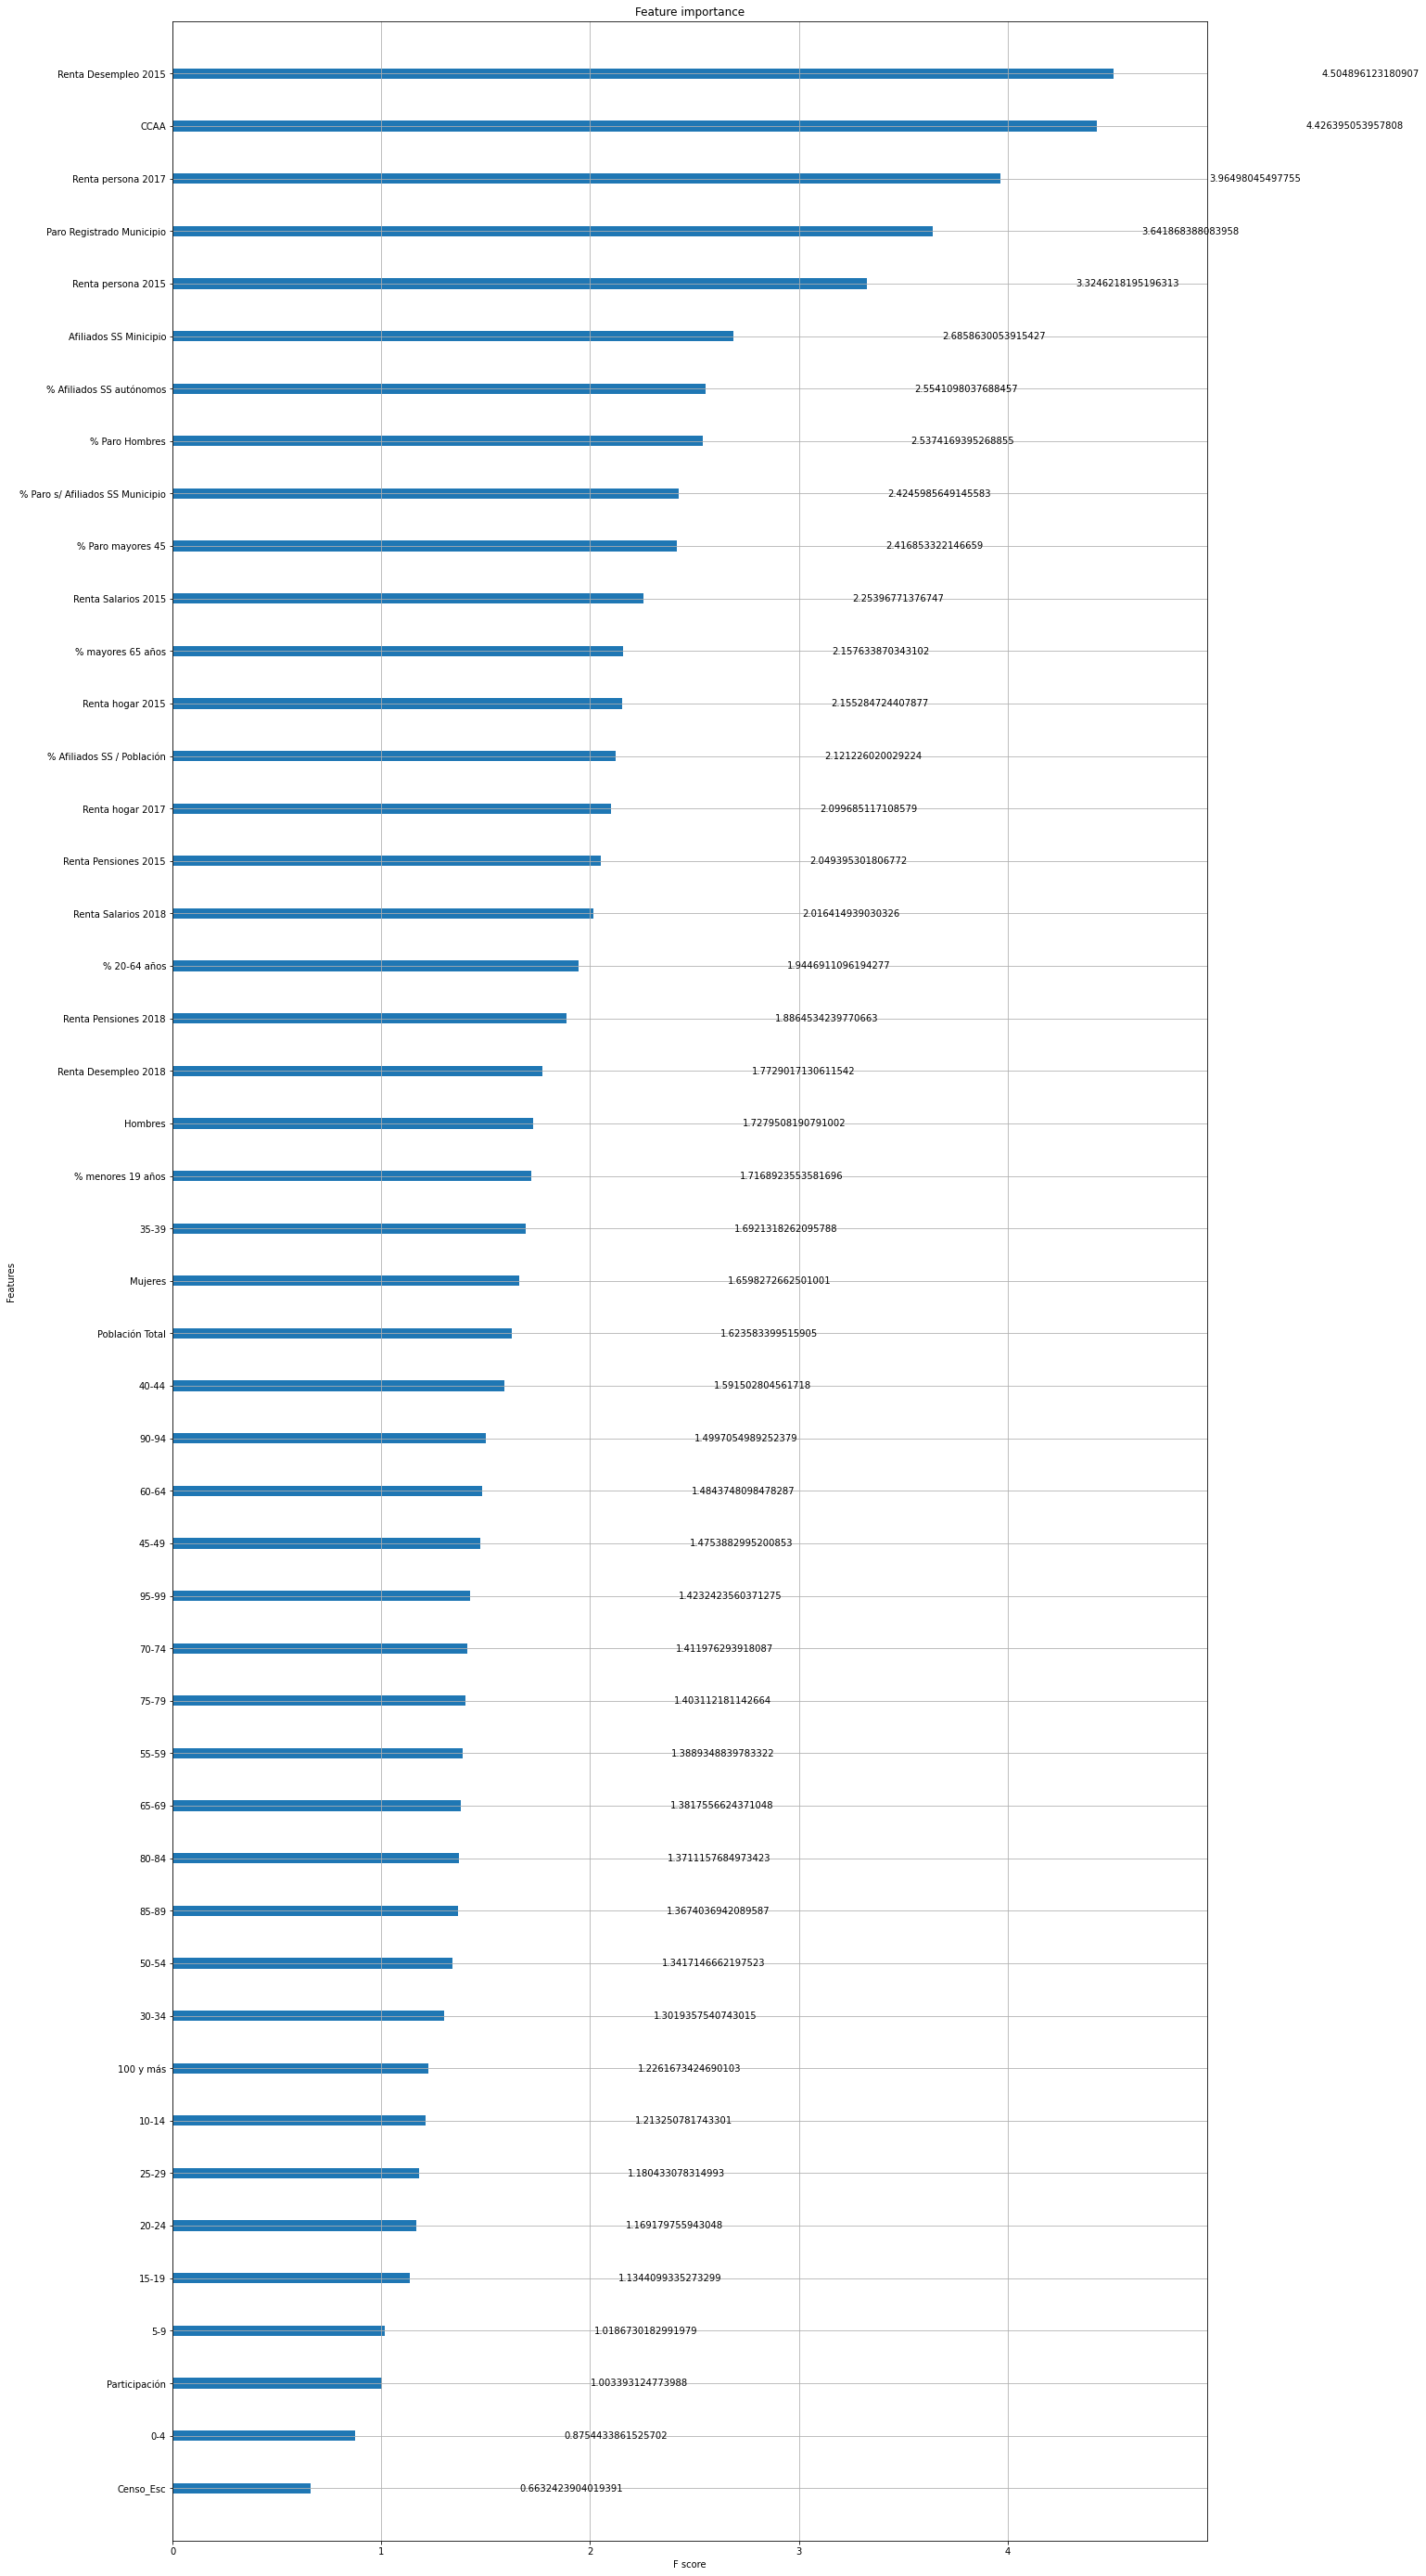

In [21]:
xgb.plot_importance(model,importance_type='gain') #gain is the average gain of splits which use the feature
plt.rcParams["figure.figsize"] = (20,50)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.789966 to fit


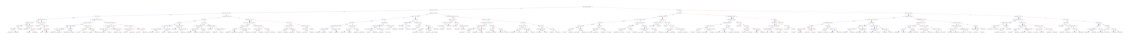

In [24]:
#xgb.plot_tree(model)
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()


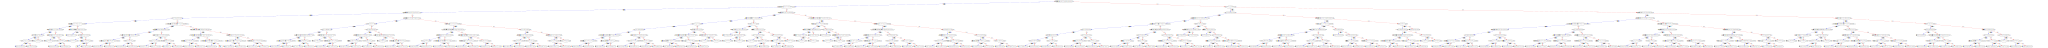

In [23]:
xgb.to_graphviz(model)